<a href="https://colab.research.google.com/github/tsuli/Cognite/blob/main/SVM_fitting_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install cognite-sdk
!pip install --upgrade cognite-sdk

     |████████████████████████████████| 181 kB 5.7 MB/s 


In [ ]:
%matplotlib inline

import os
from datetime import datetime, timedelta
from datetime import datetime
from getpass import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

from cognite.client import CogniteClient

c = CogniteClient(api_key="NTgxY2MwMTItZjFmYS00N2U0LTgxNWEtZTcwZDNiMDU0OTFm",
                       project="publicdata", client_name="Tamas Suli")
# NTgxY2MwMTItZjFmYS00N2U0LTgxNWEtZTcwZDNiMDU0OTFm

In [ ]:
all_timeseries = c.time_series.list(limit=-1).to_pandas()
val_timeseries = all_timeseries[all_timeseries['name'].str.contains('VAL_', regex=False)]
# all_timeseries.to_csv('all_timeseries.csv', header = True, index = False)
# val_timeseries.to_csv('val_timeseries.csv', header = True, index = False)
val_timeseries.index.name = 'ind'
val_timeseries.reset_index(inplace=True)
del val_timeseries['ind']
len(val_timeseries['id'])

363

In [ ]:
val_timeseries[290:310]

In [ ]:
val_timeseries.loc[val_timeseries.name=="VAL_23-PT-92539:X.Value"]
# VAL_23-FT-92537-01:X.Value - 7638223843994790 - id: 305
# VAL_23-TT-92539:X.Value - 643849686863640 - id: 30
# VAL_23-PT-92539:X.Value - 1890487216163163 - id: 75


,id,externalId,name,isString,metadata,assetId,isStep,description,securityCategories,createdTime,lastUpdatedTime,unit
75,1890487216163163,pi:160703,VAL_23-PT-92539:X.Value,False,"{'tag': 'VAL_23-PT-92539:X.Value', 'scan': '1'...",3147733389929639,False,PH 1stStgComp Discharge,[],1593024714298,1593512860522,bar


In [ ]:
i = 30

d1_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="100d-ago", end="0d-ago").to_pandas()
d1_1.index.name = 'time'
d1_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d1_1_dict = {time_title: d1_1['time'].tolist(), id_title: d1_1[d1_1.columns[1]].tolist()}
out_file = 'd1_1_bin'
np.savez(out_file, **d1_1_dict)



In [ ]:
i = 30

d1_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="200d-ago", end="101d-ago").to_pandas()
d1_2.index.name = 'time'
d1_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d1_2_dict = {time_title: d1_2['time'].tolist(), id_title: d1_2[d1_2.columns[1]].tolist()}
out_file = 'd1_2_bin'
np.savez(out_file, **d1_2_dict)

d1_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="300d-ago", end="201d-ago").to_pandas()
d1_3.index.name = 'time'
d1_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d1_3_dict = {time_title: d1_3['time'].tolist(), id_title: d1_3[d1_3.columns[1]].tolist()}
out_file = 'd1_3_bin'
np.savez(out_file, **d1_3_dict)

d2_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="400d-ago", end="301d-ago").to_pandas()
d2_1.index.name = 'time'
d2_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d2_1_dict = {time_title: d2_1['time'].tolist(), id_title: d2_1[d2_1.columns[1]].tolist()}
out_file = 'd2_1_bin'
np.savez(out_file, **d2_1_dict)

d2_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="500d-ago", end="401d-ago").to_pandas()
d2_2.index.name = 'time'
d2_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d2_2_dict = {time_title: d2_2['time'].tolist(), id_title: d2_2[d2_2.columns[1]].tolist()}
out_file = 'd2_2_bin'
np.savez(out_file, **d2_2_dict)

d2_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="600d-ago", end="501d-ago").to_pandas()
d2_3.index.name = 'time'
d2_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d2_3_dict = {time_title: d2_3['time'].tolist(), id_title: d2_3[d2_3.columns[1]].tolist()}
out_file = 'd2_3_bin'
np.savez(out_file, **d2_3_dict)

d3_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="700d-ago", end="601d-ago").to_pandas()
d3_1.index.name = 'time'
d3_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d3_1_dict = {time_title: d3_1['time'].tolist(), id_title: d3_1[d3_1.columns[1]].tolist()}
out_file = 'd3_1_bin'
np.savez(out_file, **d3_1_dict)

d3_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="800d-ago", end="701d-ago").to_pandas()
d3_2.index.name = 'time'
d3_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d3_2_dict = {time_title: d3_2['time'].tolist(), id_title: d3_2[d3_2.columns[1]].tolist()}
out_file = 'd3_2_bin'
np.savez(out_file, **d3_2_dict)

d3_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="900d-ago", end="801d-ago").to_pandas()
d3_3.index.name = 'time'
d3_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d3_3_dict = {time_title: d3_3['time'].tolist(), id_title: d3_3[d3_3.columns[1]].tolist()}
out_file = 'd3_3_bin'
np.savez(out_file, **d3_3_dict)

d4_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1000d-ago", end="901d-ago").to_pandas()
d4_1.index.name = 'time'
d4_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d4_1_dict = {time_title: d4_1['time'].tolist(), id_title: d4_1[d4_1.columns[1]].tolist()}
out_file = 'd4_1_bin'
np.savez(out_file, **d4_1_dict)

d4_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1100d-ago", end="1001d-ago").to_pandas()
d4_2.index.name = 'time'
d4_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d4_2_dict = {time_title: d4_2['time'].tolist(), id_title: d4_2[d4_2.columns[1]].tolist()}
out_file = 'd4_2_bin'
np.savez(out_file, **d4_2_dict)

d4_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1200d-ago", end="1101d-ago").to_pandas()
d4_3.index.name = 'time'
d4_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d4_3_dict = {time_title: d4_3['time'].tolist(), id_title: d4_3[d4_3.columns[1]].tolist()}
out_file = 'd4_3_bin'
np.savez(out_file, **d4_3_dict)

d5_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1300d-ago", end="1201d-ago").to_pandas()
d5_1.index.name = 'time'
d5_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d5_1_dict = {time_title: d5_1['time'].tolist(), id_title: d5_1[d5_1.columns[1]].tolist()}
out_file = 'd5_1_bin'
np.savez(out_file, **d5_1_dict)

d5_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1400d-ago", end="1301d-ago").to_pandas()
d5_2.index.name = 'time'
d5_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d5_2_dict = {time_title: d5_2['time'].tolist(), id_title: d5_2[d5_2.columns[1]].tolist()}
out_file = 'd5_2_bin'
np.savez(out_file, **d5_2_dict)

d5_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1500d-ago", end="1401d-ago").to_pandas()
d5_3.index.name = 'time'
d5_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d5_3_dict = {time_title: d5_3['time'].tolist(), id_title: d5_3[d5_3.columns[1]].tolist()}
out_file = 'd5_3_bin'
np.savez(out_file, **d5_3_dict)

d6_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1600d-ago", end="1501d-ago").to_pandas()
d6_1.index.name = 'time'
d6_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d6_1_dict = {time_title: d6_1['time'].tolist(), id_title: d6_1[d6_1.columns[1]].tolist()}
out_file = 'd6_1_bin'
np.savez(out_file, **d6_1_dict)

d6_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1700d-ago", end="1601d-ago").to_pandas()
d6_2.index.name = 'time'
d6_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d6_2_dict = {time_title: d6_2['time'].tolist(), id_title: d6_2[d6_2.columns[1]].tolist()}
out_file = 'd6_2_bin'
np.savez(out_file, **d6_2_dict)

d6_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1800d-ago", end="1701d-ago").to_pandas()
d6_3.index.name = 'time'
d6_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d6_3_dict = {time_title: d6_3['time'].tolist(), id_title: d6_3[d6_3.columns[1]].tolist()}
out_file = 'd6_3_bin'
np.savez(out_file, **d6_3_dict)

d7_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="1900d-ago", end="1801d-ago").to_pandas()
d7_1.index.name = 'time'
d7_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d7_1_dict = {time_title: d7_1['time'].tolist(), id_title: d7_1[d7_1.columns[1]].tolist()}
out_file = 'd7_1_bin'
np.savez(out_file, **d7_1_dict)

d7_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2000d-ago", end="1901d-ago").to_pandas()
d7_2.index.name = 'time'
d7_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d7_2_dict = {time_title: d7_2['time'].tolist(), id_title: d7_2[d7_2.columns[1]].tolist()}
out_file = 'd7_2_bin'
np.savez(out_file, **d7_2_dict)

d7_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2100d-ago", end="2001d-ago").to_pandas()
d7_3.index.name = 'time'
d7_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d7_3_dict = {time_title: d7_3['time'].tolist(), id_title: d7_3[d7_3.columns[1]].tolist()}
out_file = 'd7_3_bin'
np.savez(out_file, **d7_3_dict)

d8_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2200d-ago", end="2101d-ago").to_pandas()
d8_1.index.name = 'time'
d8_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d8_1_dict = {time_title: d8_1['time'].tolist(), id_title: d8_1[d8_1.columns[1]].tolist()}
out_file = 'd8_1_bin'
np.savez(out_file, **d8_1_dict)

d8_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2300d-ago", end="2201d-ago").to_pandas()
d8_2.index.name = 'time'
d8_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d8_2_dict = {time_title: d8_2['time'].tolist(), id_title: d8_2[d8_2.columns[1]].tolist()}
out_file = 'd8_2_bin'
np.savez(out_file, **d8_2_dict)

d8_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2400d-ago", end="2301d-ago").to_pandas()
d8_3.index.name = 'time'
d8_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d8_3_dict = {time_title: d8_3['time'].tolist(), id_title: d8_3[d8_3.columns[1]].tolist()}
out_file = 'd8_3_bin'
np.savez(out_file, **d8_3_dict)

d9_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2500d-ago", end="2401d-ago").to_pandas()
d9_1.index.name = 'time'
d9_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d9_1_dict = {time_title: d9_1['time'].tolist(), id_title: d9_1[d9_1.columns[1]].tolist()}
out_file = 'd9_1_bin'
np.savez(out_file, **d9_1_dict)

d9_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2600d-ago", end="2501d-ago").to_pandas()
d9_2.index.name = 'time'
d9_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d9_2_dict = {time_title: d9_2['time'].tolist(), id_title: d9_2[d9_2.columns[1]].tolist()}
out_file = 'd9_2_bin'
np.savez(out_file, **d9_2_dict)

d9_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2700d-ago", end="2601d-ago").to_pandas()
d9_3.index.name = 'time'
d9_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d9_3_dict = {time_title: d9_3['time'].tolist(), id_title: d9_3[d9_3.columns[1]].tolist()}
out_file = 'd9_3_bin'
np.savez(out_file, **d9_3_dict)

d10_1 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2900d-ago", end="2701d-ago").to_pandas()
d10_1.index.name = 'time'
d10_1.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d10_1_dict = {time_title: d10_1['time'].tolist(), id_title: d10_1[d10_1.columns[1]].tolist()}
out_file = 'd10_1_bin'
np.savez(out_file, **d10_1_dict)

d10_2 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2900d-ago", end="2701d-ago").to_pandas()
d10_2.index.name = 'time'
d10_2.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d10_2_dict = {time_title: d10_2['time'].tolist(), id_title: d10_2[d10_2.columns[1]].tolist()}
out_file = 'd10_2_bin'
np.savez(out_file, **d10_2_dict)

d10_3 = c.datapoints.retrieve(id=int(val_timeseries['id'][i]), start="2900d-ago", end="2701d-ago").to_pandas()
d10_3.index.name = 'time'
d10_3.reset_index(inplace=True)
id_title = 'm_' + str(val_timeseries['id'][i])
time_title = 't_' + str(val_timeseries['id'][i])
d10_3_dict = {time_title: d10_3['time'].tolist(), id_title: d10_3[d10_3.columns[1]].tolist()}
out_file = 'd10_3_bin'
np.savez(out_file, **d10_3_dict)

In [ ]:
t = np.arange(0, 10, 0.1) # Generate np arrays
x = np.sin(t)
data_dict1 = {'time1': t, 'signal1': x} # Group them in a dictionary
data_dict2 = {'time2': t, 'signal2': x} # Group them in a dictionary
data_dict3 = {**data_dict1, **data_dict2}
out_file = 'binary_conc2'
np.savez(out_file, **data_dict3) # Save dictionary to '.npz'-file


In [ ]:
new_data = np.load(out_file + '.npz') # Load '.npz'-file
#plt.plot(new_data['time'], new_data['signal']) # Use loaded data
new_dict = dict(new_data)
new_dict

In [ ]:
from cognite.client.data_classes import Asset

In [ ]:
subtree_root_asset="pi:160627"
subtree = c.assets.retrieve(external_id=subtree_root_asset).subtree()
related_events = subtree.events() 

In [ ]:
# VAL_23-FT-92537-01:X.Value - 7638223843994790 - id: 305
# VAL_23-TT-92539:X.Value - 643849686863640 - id: 30
# VAL_23-PT-92539:X.Value - 1890487216163163 - id: 75

dps = c.datapoints.retrieve(id=[7638223843994790, 643849686863640, 1890487216163163],
                        start=datetime(2019,7,15),
                        end=datetime(2021,12,20),
                        aggregates=["average"],
                        granularity="6s").to_pandas()

dps.index.name = 'time'
dps.reset_index(inplace=True)

In [ ]:
Y_dict_6s = {'time': dps['time'].tolist(), 'Y1': dps[dps.columns[1]].tolist(), 'Y2': dps[dps.columns[2]].tolist(), 'Y3': dps[dps.columns[3]].tolist() }
out_file = 'Y_data_6s'
np.savez(out_file, **Y_dict_6s)

In [ ]:
dpm = c.datapoints.retrieve(id=[7638223843994790, 643849686863640, 1890487216163163],
                        start=datetime(2019,7,15),
                        end=datetime(2021,12,20),
                        aggregates=["average"],
                        granularity="1m").to_pandas()

dpm.index.name = 'time'
dpm.reset_index(inplace=True)

Y_dict_1m = {'time': dpm['time'].tolist(), 'Y1': dpm[dpm.columns[1]].tolist(), 'Y2': dpm[dpm.columns[2]].tolist(), 'Y3': dpm[dpm.columns[3]].tolist() }
out_file = 'Y_dict_1m'
np.savez(out_file, **Y_dict_1m)

In [3]:
pip install plydata

     |████████████████████████████████| 299 kB 7.5 MB/s 


In [4]:
import pandas as pd
import numpy as np
from plydata import define, query, if_else, ply

In [5]:
df = pd.DataFrame({
    'x': [0, 1, 2, 3],
    'y': ['zero', 'one', 'two', 'three']})

df >> define(z='x')

,x,y,z
0,0,zero,0
1,1,one,1
2,2,two,2
3,3,three,3


In [ ]:
df >> define(z=if_else('x > 1', 1, 0))

In [7]:
df >> query('x > 1')

,x,y
2,2,two
3,3,three


In [8]:
from plotnine import ggplot, aes, geom_line

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


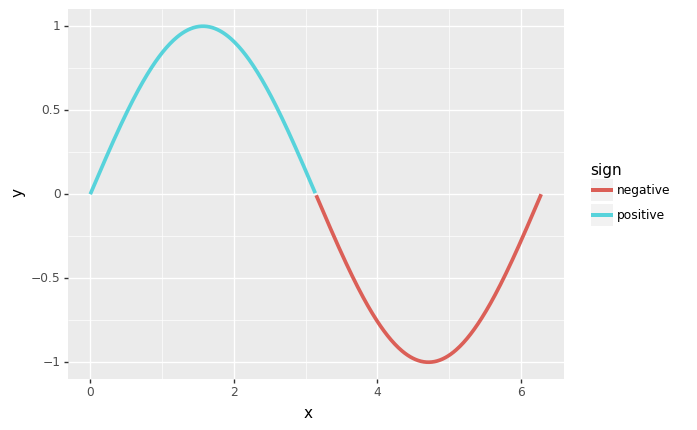

<ggplot: (8746103224341)>

In [9]:
df = pd.DataFrame({'x': np.linspace(0, 2*np.pi, 500)})
(df
 >> define(y='np.sin(x)')
 >> define(sign=if_else('y >= 0', '"positive"', '"negative"'))
 >> (ggplot(aes('x', 'y'))
     + geom_line(aes(color='sign'), size=1.5))
 )